In [1]:
%matplotlib inline

In [44]:
import pandas as pd
import numpy as np
import networkx as nx
import scipy.io as sio
import scipy.sparse as sp
from tqdm import tqdm

from matplotlib import pyplot as plt
from helpers import (
    draw_edges, get_borderless_fig, pos_spring_layout, signed_layout, get_lcc, signed_normalized_laplacian, flatten,
    pos_adj, neg_adj
)
from viz_helpers import draw_query_result
from stat_helpers import populate_fields

In [77]:
fields_to_show = ['query', 'best_beta', 'size1', 'size2', 'agreement', 'ham', 'coh', 'opp', 'pos_avg', 'pc']

def exclude_overlapping_rows(df, by):
    """remove result that have overlaps"""
    non_overlapping_rows = []
    sorted_df = df.sort_values(by=by, ascending=False)
    covered_nodes = set()
    for i, r in tqdm(sorted_df.iterrows(), total=df.shape[0]):
        C = set(r['C1']) | set(r['C2'])
        if len(C.intersection(covered_nodes)) == 0:
            non_overlapping_rows.append(dict(r))
            covered_nodes |= C
    filtered_df = pd.DataFrame.from_records(non_overlapping_rows)
    return filtered_df

def show(g, df, idx, prefix="", **kwargs):
    r = df.loc[idx]
    fig, ax = draw_query_result(
        g, r['C1'], r['C2'], seeds1=[r['seed1']], seeds2=[r['seed2']], **kwargs
    )
    ax.set_title('{} s1:{}, s2:{}, ham:{:.2f}, beta: {:.2f}, pc: {:.1f}, agr:{:.2f}, opp:{:.2f}, coh:{:.2f}, pos_avg_deg:{:.2f}'.format(
        prefix,
        r['seed1'], r['seed2'],
        r['ham'], r['beta'], r['pc'],
        r['agreement'],
        r['opp'],
        r['coh'],
        r['pos_avg']
    ))
    
def show_top_k_by(g, df, by, k=3, ascending=False):
    # print(df[fields_to_show].sort_values(by=by, ascending=ascending).head(k))    
    df = exclude_overlapping_rows(df, by=by)
    print('{} entries after filtering, ranked by {}'.format(df.shape[0], by))
        
    indices = df.sort_values(by=by, ascending=ascending).head(k).index
    for idx in indices:
        show(g, df, idx, prefix="Ranked by *{}* ".format(by))
                 
def load_data(graph, k=200):
    g = nx.read_gpickle('graphs/{}.pkl'.format(graph))
    df = pd.read_pickle('outputs/{}_seed_pair_aug_k{}.pkl'.format(graph, k))
    return g, df            

def graph_showcase(graph, threshold_k=200, show_k=3):
    keys = ['beta', 'ham', 'pc']

    g, df = load_data(graph, threshold_k)
    for key in keys:
        if key == 'beta':
            ascending = True
        else:
            ascending = False
        show_top_k_by(g, df, key, k=show_k, ascending=ascending)    

  0%|          | 0/3642 [00:00<?, ?it/s]

38 entries after filtering, ranked by beta


  0%|          | 0/3642 [00:00<?, ?it/s]

57 entries after filtering, ranked by ham


100%|██████████| 3642/3642 [00:00<00:00, 4068.11it/s]


39 entries after filtering, ranked by pc


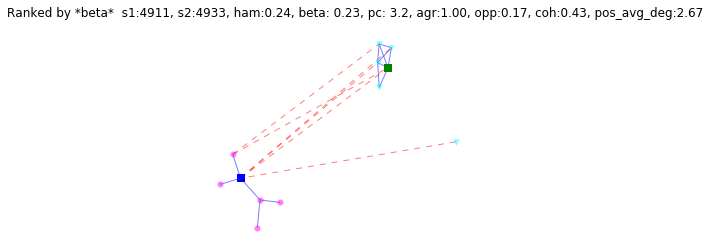

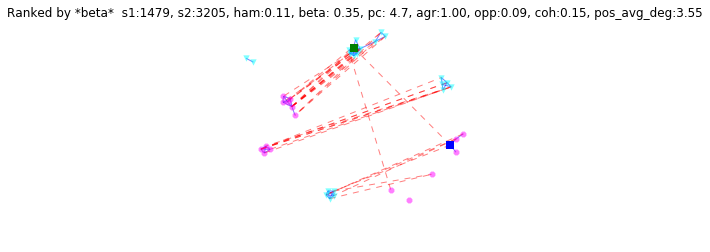

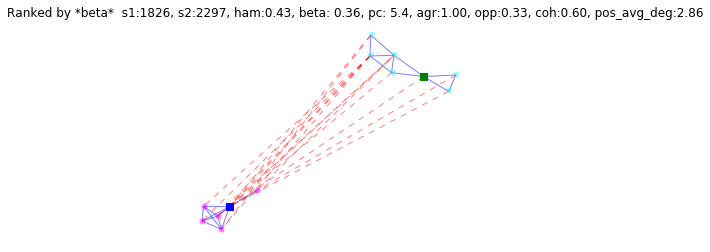

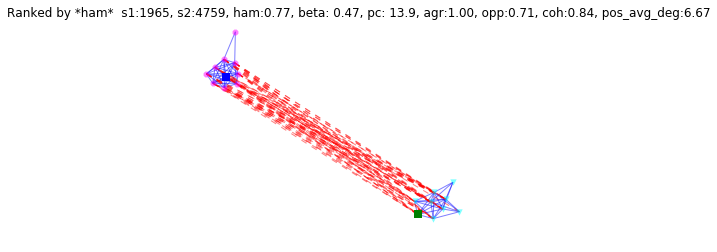

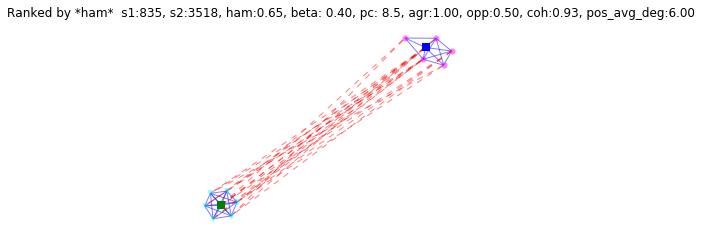

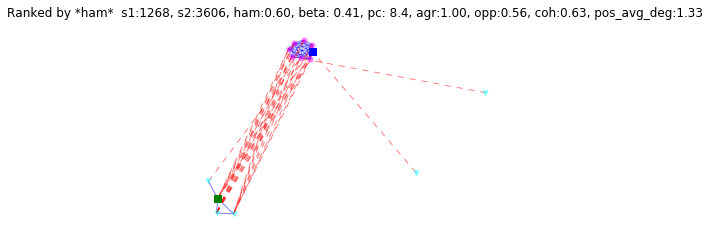

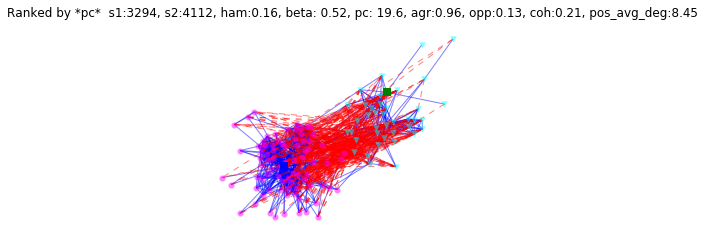

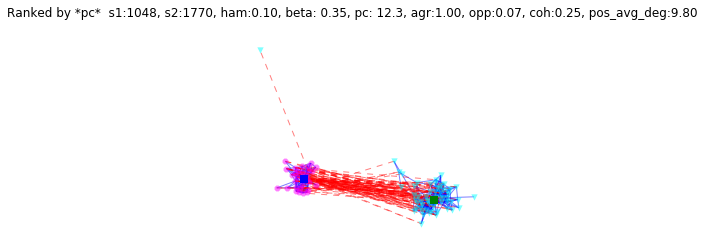

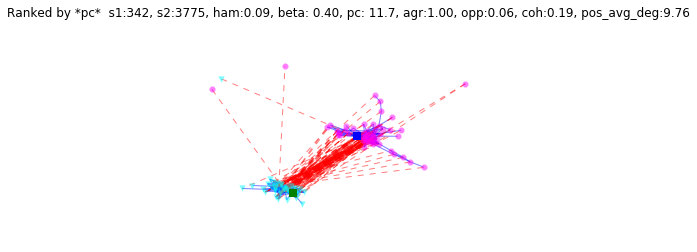

In [80]:
graph_showcase('word')

100%|██████████| 1115/1115 [00:00<00:00, 3240.00it/s]


23 entries after filtering, ranked by beta


100%|██████████| 1115/1115 [00:00<00:00, 3886.16it/s]


29 entries after filtering, ranked by ham


100%|██████████| 1115/1115 [00:00<00:00, 3010.63it/s]


24 entries after filtering, ranked by pc


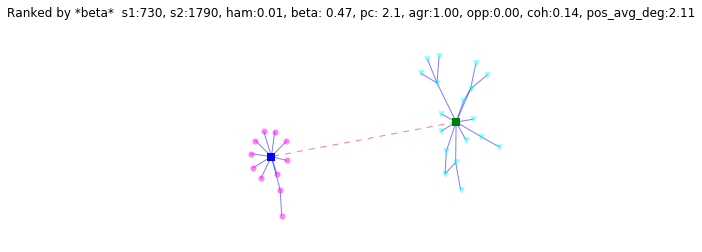

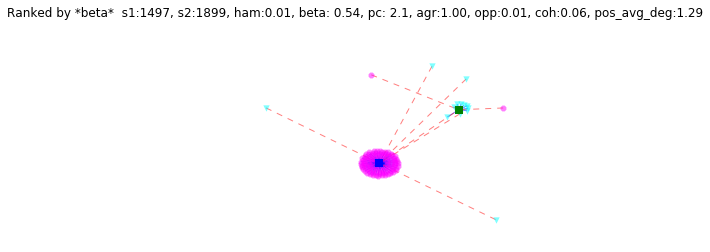

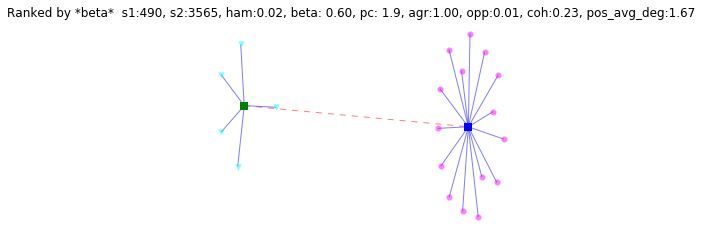

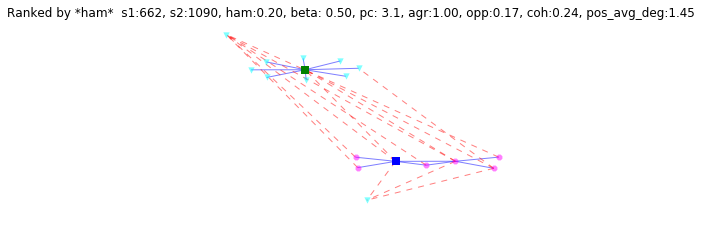

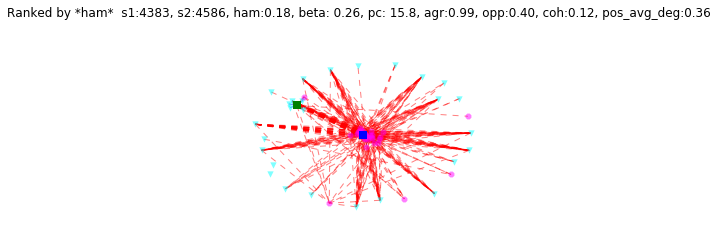

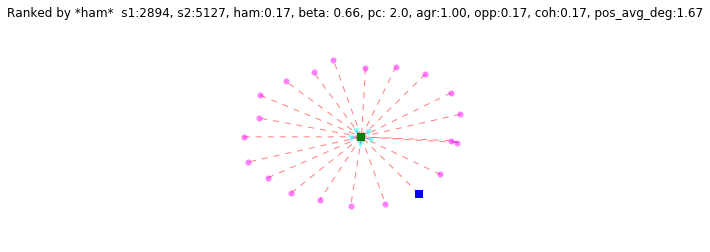

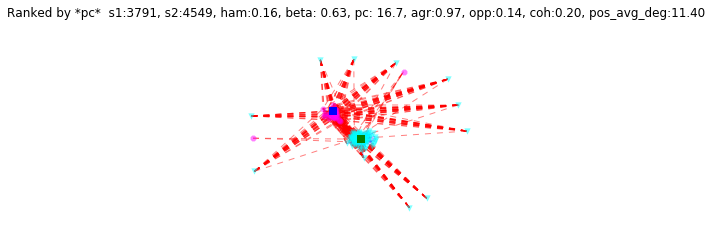

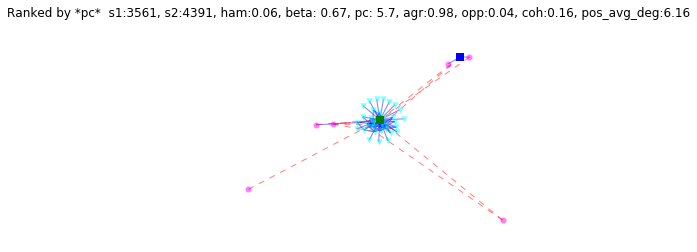

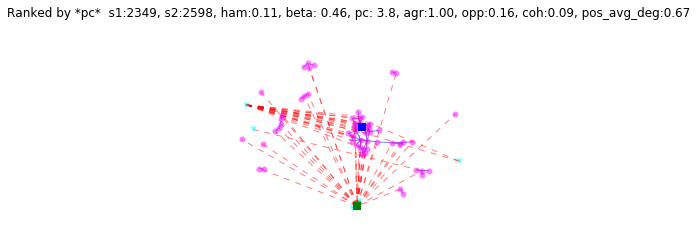

In [81]:
graph_showcase('bitcoin')

  0%|          | 0/4639 [00:00<?, ?it/s]

30 entries after filtering, ranked by beta


100%|██████████| 4639/4639 [00:01<00:00, 3923.08it/s]


35 entries after filtering, ranked by ham


100%|██████████| 4639/4639 [00:01<00:00, 4176.72it/s]


24 entries after filtering, ranked by pc


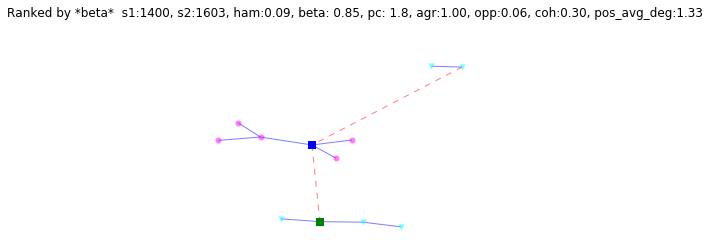

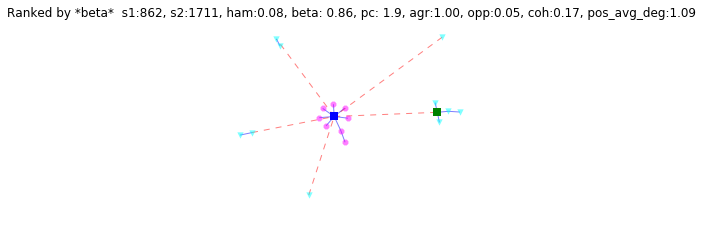

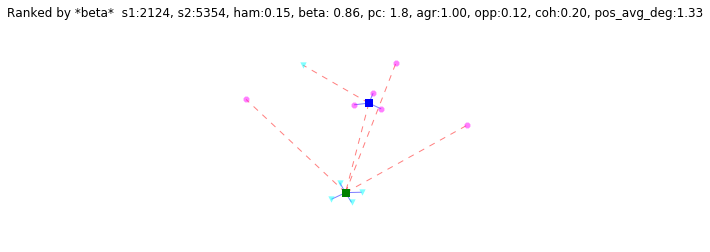

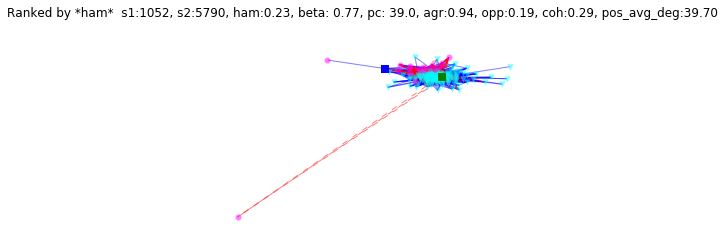

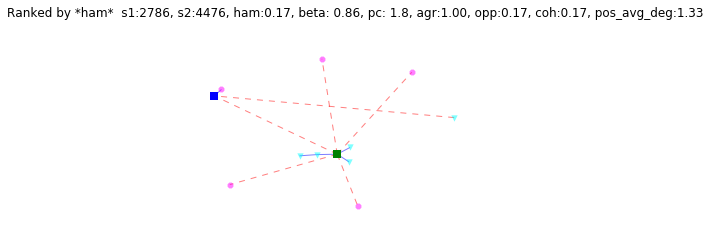

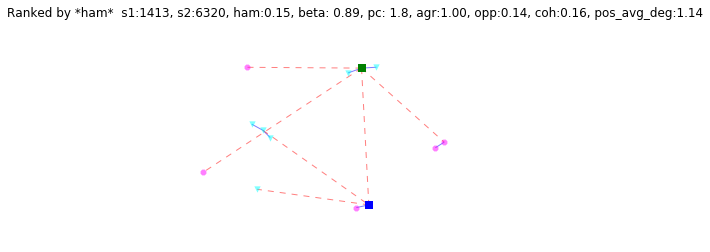

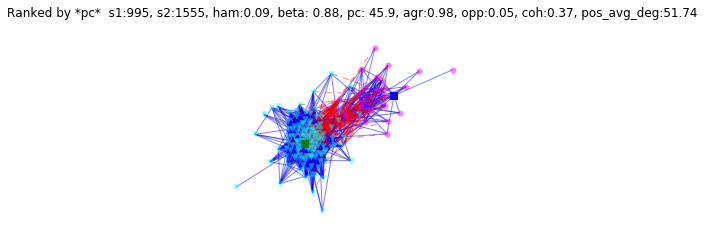

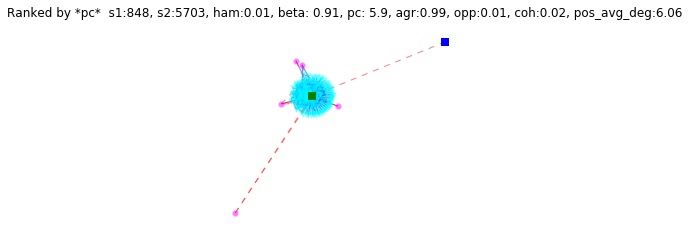

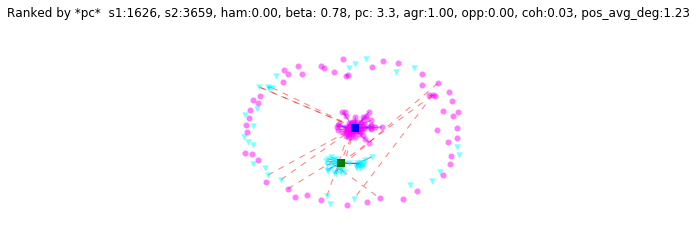

In [83]:
graph_showcase('ref')

100%|██████████| 9535/9535 [00:02<00:00, 4361.59it/s]


221 entries after filtering, ranked by beta


100%|██████████| 9535/9535 [00:02<00:00, 4248.15it/s]


253 entries after filtering, ranked by ham


100%|██████████| 9535/9535 [00:02<00:00, 4400.62it/s]


214 entries after filtering, ranked by pc


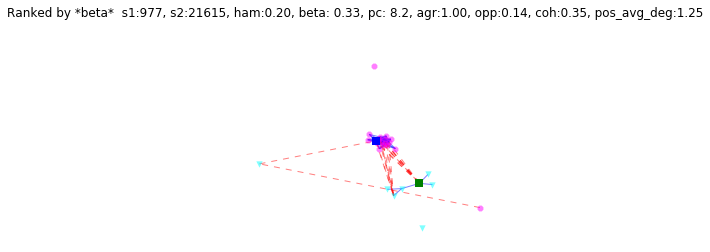

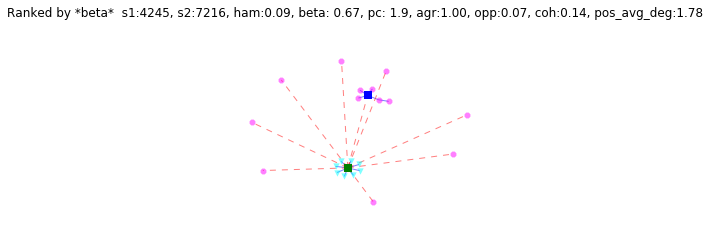

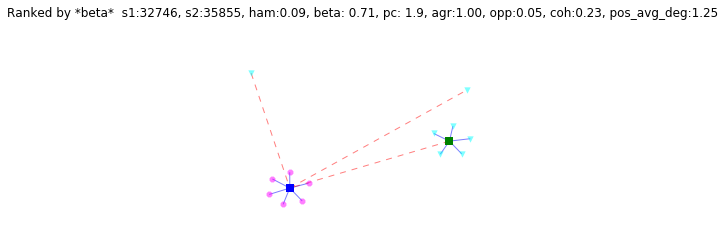

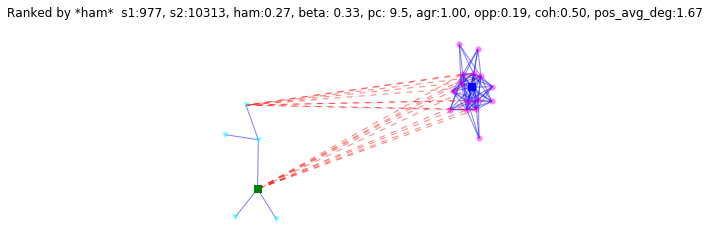

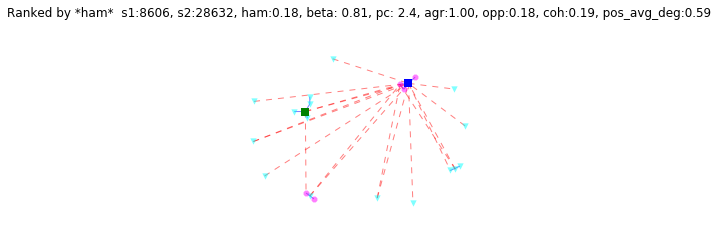

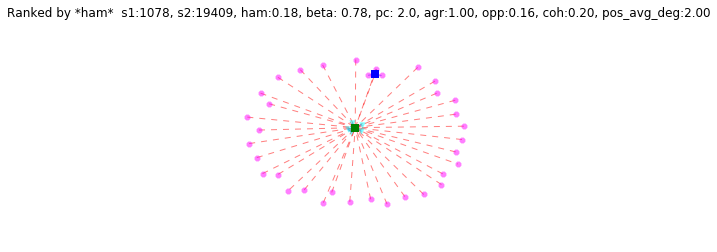

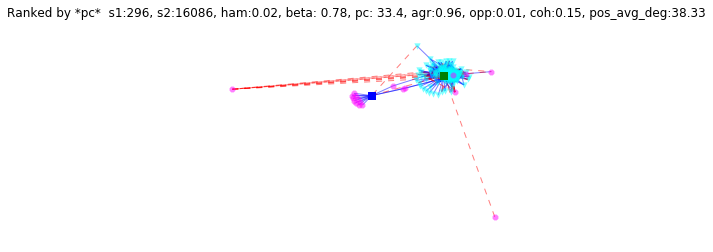

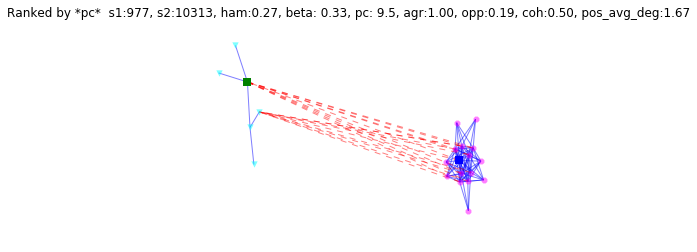

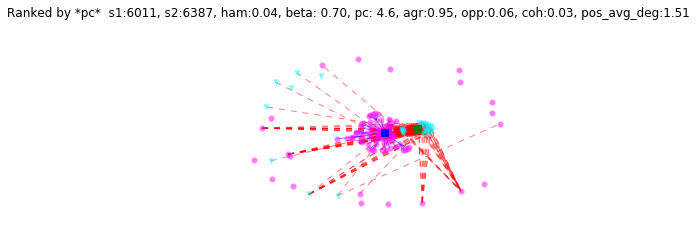

In [82]:
graph_showcase('slashdot')

100%|██████████| 9684/9684 [00:02<00:00, 3709.49it/s]


199 entries after filtering, ranked by beta


  0%|          | 0/9684 [00:00<?, ?it/s]

220 entries after filtering, ranked by ham


100%|██████████| 9684/9684 [00:02<00:00, 4492.66it/s]


190 entries after filtering, ranked by pc


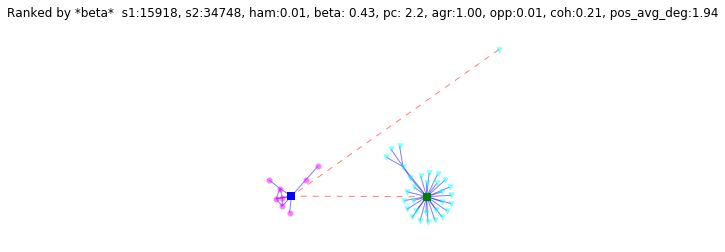

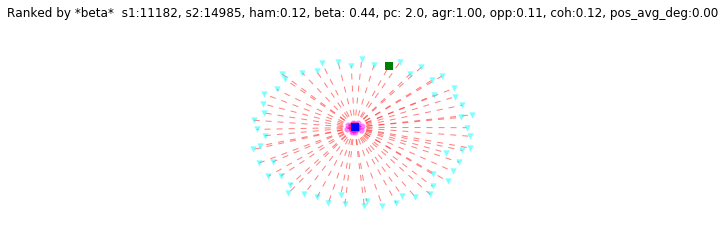

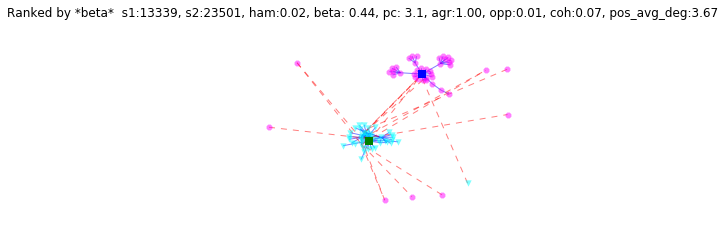

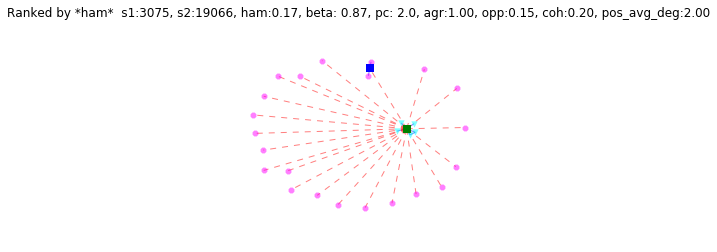

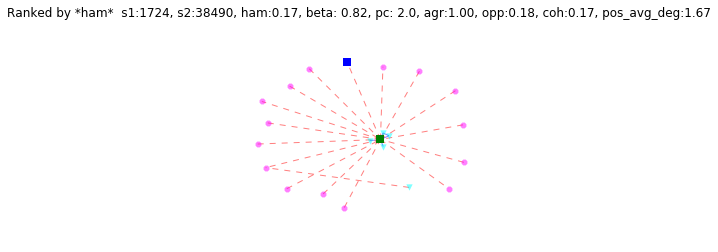

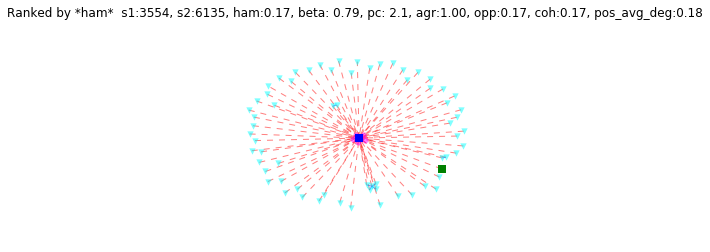

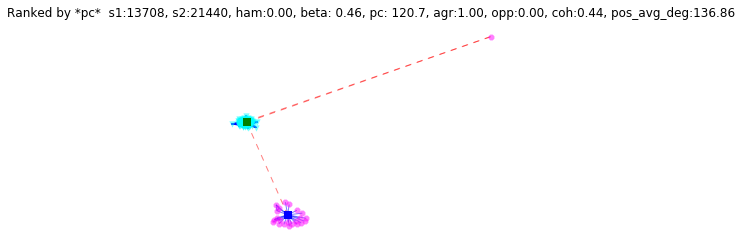

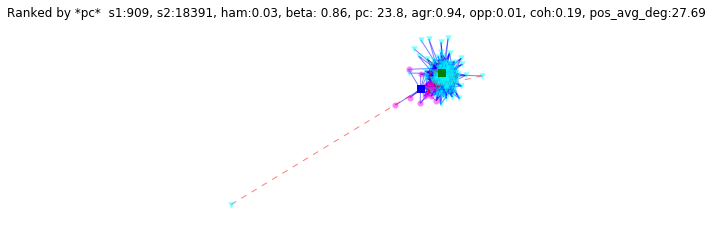

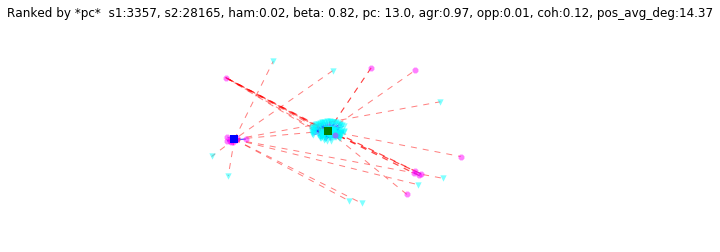

In [85]:
graph_showcase('epinions')

100%|██████████| 8288/8288 [00:01<00:00, 4153.84it/s]


198 entries after filtering, ranked by beta


100%|██████████| 8288/8288 [00:01<00:00, 4530.02it/s]


199 entries after filtering, ranked by ham


100%|██████████| 8288/8288 [00:02<00:00, 3995.35it/s]


189 entries after filtering, ranked by pc


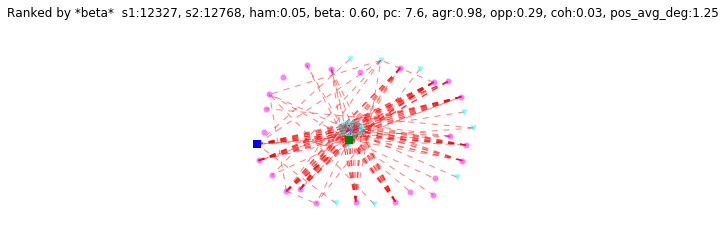

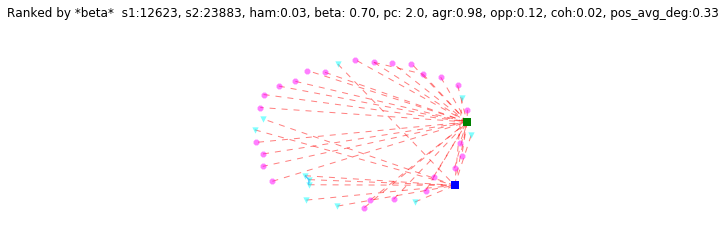

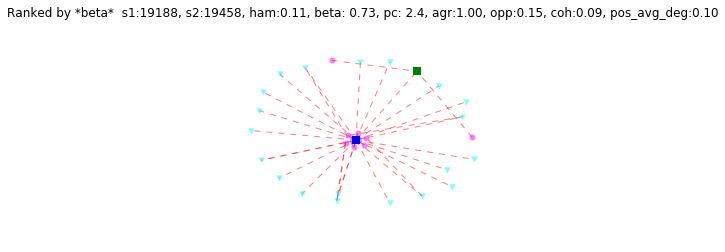

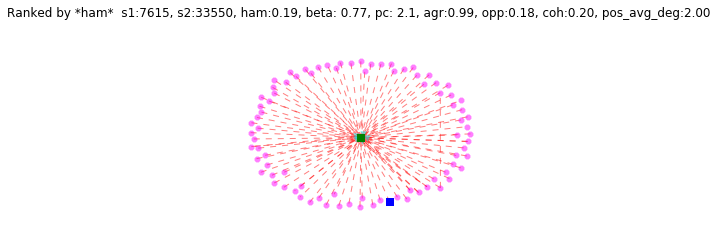

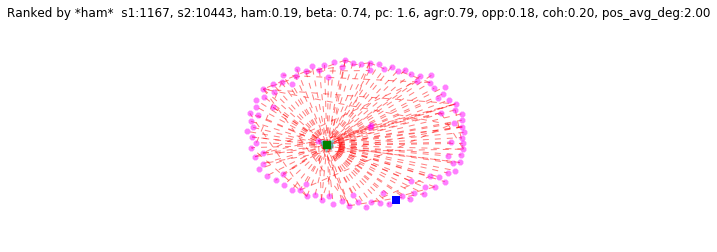

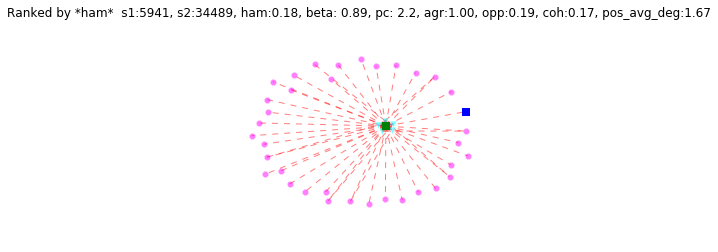

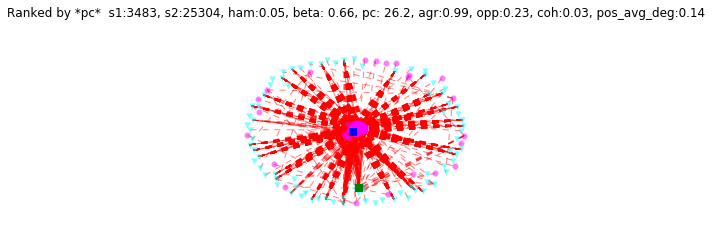

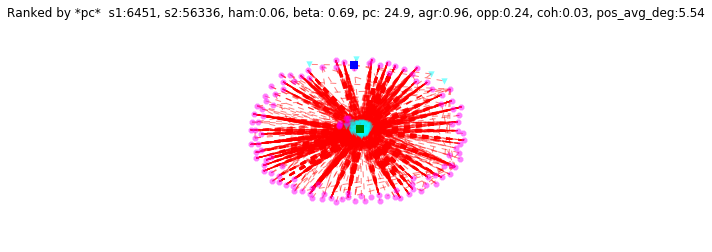

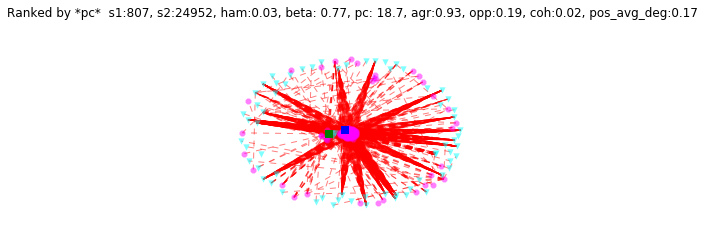

In [86]:
graph_showcase('wikiconflict')